In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import reprlib

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'500',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4bb43acf-36ac-4145-8cea-55ac3b00781e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(reprlib.repr(data))
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'data': [{'circulating_supply': 19065587, 'cmc_rank': 1, 'date_added': '2013-04-28T00:00:00.000Z', 'id': 1, ...}, {'circulating_supply': 121145181.4365, 'cmc_rank': 2, 'date_added': '2015-08-07T00:00:00.000Z', 'id': 1027, ...}, {'circulating_supply': 72494981446.97955, 'cmc_rank': 3, 'date_added': '2015-02-25T00:00:00.000Z', 'id': 825, ...}, {'circulating_supply': 53918665569.43716, 'cmc_rank': 4, 'date_added': '2018-10-08T00:00:00.000Z', 'id': 3408, ...}, {'circulating_supply': 163276974.63, 'cmc_rank': 5, 'date_added': '2017-07-25T00:00:00.000Z', 'id': 1839, ...}, {'circulating_supply': 33739028515.755, 'cmc_rank': 6, 'date_added': '2017-10-01T00:00:00.000Z', 'id': 2010, ...}, ...], 'status': {'credit_count': 3, 'elapsed': 121, 'error_code': 0, 'error_message': None, ...}}


# Normalize the data

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None) #display all the columns in our dataframe
#pd.set_option('display.max_rows', None) #display all rows

In [3]:
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.906559e+07,1.906559e+07,NaN,1,NaN,NaN,2022-06-12T15:58:00.000Z,28071.577840,3.557771e+10,20.3644,0.788439,-0.905481,-6.245691,-7.429283,-31.876120,-27.914089,5.352011e+11,47.3714,5.895031e+11,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211452e+08,1.211452e+08,NaN,2,NaN,NaN,2022-06-12T15:58:00.000Z,1523.231651,2.453838e+10,11.5150,0.789101,0.858317,-15.755660,-27.106783,-50.821503,-40.794303,1.845322e+11,16.3332,1.845322e+11,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34602,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249498e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-12T15:58:00.000Z,0.998899,6.143152e+10,17.9536,-0.002334,-0.018553,-0.036808,-0.006496,-0.135539,-0.143281,7.241517e+10,6.4096,7.962287e+10,2022-06-12T15:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4381,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.391867e+10,5.391867e+10,NaN,4,NaN,NaN,2022-06-12T15:58:00.000Z,1.000060,6.101331e+09,26.4981,0.005067,-0.020425,-0.072899,-0.022871,0.036790,0.021846,5.392191e+10,4.7716,5.392191e+10,2022-06-12T15:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-12T15:57:00.000Z,264.214277,1.415604e+09,16.9329,0.263693,-1.034251,-11.431428,-12.711902,-36.808308,-28.293332,4.314011e+10,3.8184,4.362621e+10,2022-06-12T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18112,Alpine F1 Team Fan Token,ALPINE,alpine-f1-team-fan-token,24,2022-02-21T12:02:04.000Z,"[fan-token, bnb-chain]",40000000.0,1.136000e+07,4.000000e+07,NaN,497,NaN,NaN,2022-06-12T15:57:00.000Z,2.613964,4.719476e+06,7.8025,4.626984,-3.789431,-18.156820,-13.346515,-55.750079,-70.860624,2.969463e+07,0.0000,1.045586e+08,2022-06-12T15:57:00.000Z,1839.0,BNB,BNB,bnb,0x287880Ea252b52b63Cc5f40a2d3E5A44aa665a76
496,11562,Kava Swap,SWP,kava-swap,5,2021-09-01T22:04:14.000Z,[],250000000.0,3.385417e+07,2.500000e+08,NaN,496,33854166.0,2.966655e+07,2022-06-12T15:58:00.000Z,0.876304,7.928067e+05,-21.3162,0.024300,2.674038,-0.743663,11.488345,-46.453459,-51.693711,2.966655e+07,0.0000,2.190760e+08,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN
497,8972,Seedify.fund,SFUND,seedify-fund,27,2021-03-29T00:00:00.000Z,"[gaming, launchpad, polygon-ecosystem, play-to...",100000000.0,2.453677e+07,1.000000e+08,NaN,498,10933308.0,1.317604e+07,2022-06-12T15:58:00.000Z,1.205128,2.536799e+06,5.2662,0.423108,-2.566743,-17.442040,-26.981766,-70.280677,-71.931869,2.956995e+07,0.0000,1.205128e+08,2022-06-12T15:58:00.000Z,1839.0,BNB,BNB,bnb,0x477bc8d23c634c154061869478bce96be6045d12
498,1521,Komodo,KMD,komodo,31,2017-02-05T00:00:00.000Z,"[mineable, hybrid-dpow-pow, equihash, platform...",200000000.0,1.322019e+08,1.315867e+08,NaN,499,NaN,NaN,2022-06-12T15:57:00.000Z,0.220442,1.502636e+06,48.2711,1.604939,-2.475

# Automate pull process

In [4]:
# create timestamp column to have a date for each pull successfully executed

df['timestamp'] = pd.to_datetime('now')
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.906559e+07,1.906559e+07,NaN,1,NaN,NaN,2022-06-12T15:58:00.000Z,28071.577840,3.557771e+10,20.3644,0.788439,-0.905481,-6.245691,-7.429283,-31.876120,-27.914089,5.352011e+11,47.3714,5.895031e+11,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211452e+08,1.211452e+08,NaN,2,NaN,NaN,2022-06-12T15:58:00.000Z,1523.231651,2.453838e+10,11.5150,0.789101,0.858317,-15.755660,-27.106783,-50.821503,-40.794303,1.845322e+11,16.3332,1.845322e+11,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995
2,825,Tether,USDT,tether,34602,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249498e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-12T15:58:00.000Z,0.998899,6.143152e+10,17.9536,-0.002334,-0.018553,-0.036808,-0.006496,-0.135539,-0.143281,7.241517e+10,6.4096,7.962287e+10,2022-06-12T15:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-12 15:59:19.466995
3,3408,USD Coin,USDC,usd-coin,4381,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.391867e+10,5.391867e+10,NaN,4,NaN,NaN,2022-06-12T15:58:00.000Z,1.000060,6.101331e+09,26.4981,0.005067,-0.020425,-0.072899,-0.022871,0.036790,0.021846,5.392191e+10,4.7716,5.392191e+10,2022-06-12T15:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-12 15:59:19.466995
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-12T15:57:00.000Z,264.214277,1.415604e+09,16.9329,0.263693,-1.034251,-11.431428,-12.711902,-36.808308,-28.293332,4.314011e+10,3.8184,4.362621e+10,2022-06-12T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995


In [5]:
#function to automatically pull

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'500',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4bb43acf-36ac-4145-8cea-55ac3b00781e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(reprlib.repr(data))
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #append result to original dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    

In [6]:
#scrpit to automatically run the function

import os
from time import time
from time import sleep #give us the ability to track the time so that we are able to run through and call the function above in certain intervals

for i in range(333): #333 is the maximum number of times daily that we can run the API as set on the oficial API documentation 
    api_runner()
    print('API runner successfully completed')
    sleep(60) #sleep for 1 minute
exit()

{'data': [{'circulating_supply': 19065587, 'cmc_rank': 1, 'date_added': '2013-04-28T00:00:00.000Z', 'id': 1, ...}, {'circulating_supply': 121145181.4365, 'cmc_rank': 2, 'date_added': '2015-08-07T00:00:00.000Z', 'id': 1027, ...}, {'circulating_supply': 72494981446.97955, 'cmc_rank': 3, 'date_added': '2015-02-25T00:00:00.000Z', 'id': 825, ...}, {'circulating_supply': 53918665569.43716, 'cmc_rank': 4, 'date_added': '2018-10-08T00:00:00.000Z', 'id': 3408, ...}, {'circulating_supply': 163276974.63, 'cmc_rank': 5, 'date_added': '2017-07-25T00:00:00.000Z', 'id': 1839, ...}, {'circulating_supply': 33739028515.755, 'cmc_rank': 6, 'date_added': '2017-10-01T00:00:00.000Z', 'id': 2010, ...}, ...], 'status': {'credit_count': 3, 'elapsed': 178, 'error_code': 0, 'error_message': None, ...}}
API runner successfully completed
{'data': [{'circulating_supply': 19065587, 'cmc_rank': 1, 'date_added': '2013-04-28T00:00:00.000Z', 'id': 1, ...}, {'circulating_supply': 121145181.4365, 'cmc_rank': 2, 'date_adde

KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.906559e+07,1.906559e+07,NaN,1,NaN,NaN,2022-06-12T15:58:00.000Z,28071.577840,3.557771e+10,20.3644,0.788439,-0.905481,-6.245691,-7.429283,-31.876120,-27.914089,5.352011e+11,47.3714,5.895031e+11,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211452e+08,1.211452e+08,NaN,2,NaN,NaN,2022-06-12T15:58:00.000Z,1523.231651,2.453838e+10,11.5150,0.789101,0.858317,-15.755660,-27.106783,-50.821503,-40.794303,1.845322e+11,16.3332,1.845322e+11,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995
2,825,Tether,USDT,tether,34602,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.249498e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-12T15:58:00.000Z,0.998899,6.143152e+10,17.9536,-0.002334,-0.018553,-0.036808,-0.006496,-0.135539,-0.143281,7.241517e+10,6.4096,7.962287e+10,2022-06-12T15:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-12 15:59:19.466995
3,3408,USD Coin,USDC,usd-coin,4381,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.391867e+10,5.391867e+10,NaN,4,NaN,NaN,2022-06-12T15:58:00.000Z,1.000060,6.101331e+09,26.4981,0.005067,-0.020425,-0.072899,-0.022871,0.036790,0.021846,5.392191e+10,4.7716,5.392191e+10,2022-06-12T15:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-12 15:59:19.466995
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-12T15:57:00.000Z,264.214277,1.415604e+09,16.9329,0.263693,-1.034251,-11.431428,-12.711902,-36.808308,-28.293332,4.314011e+10,3.8184,4.362621e+10,2022-06-12T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18112,Alpine F1 Team Fan Token,ALPINE,alpine-f1-team-fan-token,24,2022-02-21T12:02:04.000Z,"[fan-token, bnb-chain]",40000000.0,1.136000e+07,4.000000e+07,NaN,496,NaN,NaN,2022-06-12T16:01:00.000Z,2.623356,4.758333e+06,7.4223,4.589740,-3.761260,-17.965116,-13.154793,-55.487515,-70.656587,2.980132e+07,0.0000,1.049342e+08,2022-06-12T16:01:00.000Z,1839.0,BNB,BNB,bnb,0x287880Ea252b52b63Cc5f40a2d3E5A44aa665a76,2022-06-12 16:02:21.166131
496,11562,Kava Swap,SWP,kava-swap,5,2021-09-01T22:04:14.000Z,[],250000000.0,3.385417e+07,2.500000e+08,NaN,497,33854166.0,2.963636e+07,2022-06-12T16:01:00.000Z,0.875412,7.916025e+05,-21.7851,-0.102071,2.119032,-0.821914,11.299626,-46.523567,-51.855017,2.963636e+07,0.0000,2.188531e+08,2022-06-12T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 16:02:21.166131
497,8972,Seedify.fund,SFUND,seedify-fund,27,2021-03-29T00:00:00.000Z,"[gaming, launchpad, polygon-ecosystem, play-to...",100000000.0,2.453677e+07,1.000000e+08,NaN,498,10933308.0,1.318889e+07,2022-06-12T16:02:00.000Z,1.206304,2.536365e+06,5.3621,0.400939,-2.616043,-17.355732,-26.624264,-70.259210,-71.815997,2.959880e+07,0.0000,1.206304e+08,2022-06-12T16:02:00.000Z,1839.0,BNB,BNB,bnb,0x477bc8d23c634c154061869478bce96be6045d12,2022-06-12 16:02:21.166131


# Cleaning the data 

In [8]:
#correcting the numbers format for readability
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9528,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19065587.00000,19065587.00000,NaN,1,NaN,NaN,2022-06-12T15:58:00.000Z,28071.57784,35577711564.26641,20.36440,0.78844,-0.90548,-6.24569,-7.42928,-31.87612,-27.91409,535201109537.61926,47.37140,589503134642.01001,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995
1,1027,Ethereum,ETH,ethereum,5745,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121145181.43650,121145181.43650,NaN,2,NaN,NaN,2022-06-12T15:58:00.000Z,1523.23165,24538380206.62664,11.51500,0.78910,0.85832,-15.75566,-27.10678,-50.82150,-40.79430,184532174686.51498,16.33320,184532174686.51999,2022-06-12T15:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995
2,825,Tether,USDT,tether,34602,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72494981446.97955,79710622658.24379,NaN,3,NaN,NaN,2022-06-12T15:58:00.000Z,0.99890,61431520995.46276,17.95360,-0.00233,-0.01855,-0.03681,-0.00650,-0.13554,-0.14328,72415172499.47861,6.40960,79622870088.73000,2022-06-12T15:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-12 15:59:19.466995
3,3408,USD Coin,USDC,usd-coin,4381,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53918665569.43716,53918665569.43716,NaN,4,NaN,NaN,2022-06-12T15:58:00.000Z,1.00006,6101330968.24801,26.49810,0.00507,-0.02042,-0.07290,-0.02287,0.03679,0.02185,53921908489.32177,4.77160,53921908489.32000,2022-06-12T15:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-12 15:59:19.466995
4,1839,BNB,BNB,bnb,947,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-12T15:57:00.000Z,264.21428,1415603814.44739,16.93290,0.26369,-1.03425,-11.43143,-12.71190,-36.80831,-28.29333,43140107770.15305,3.81840,43626205331.16000,2022-06-12T15:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 15:59:19.466995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18112,Alpine F1 Team Fan Token,ALPINE,alpine-f1-team-fan-token,24,2022-02-21T12:02:04.000Z,"[fan-token, bnb-chain]",40000000.00000,11360000.00000,40000000.00000,NaN,496,NaN,NaN,2022-06-12T16:01:00.000Z,2.62336,4758333.30376,7.42230,4.58974,-3.76126,-17.96512,-13.15479,-55.48752,-70.65659,29801319.52421,0.00000,104934223.68000,2022-06-12T16:01:00.000Z,1839.00000,BNB,BNB,bnb,0x287880Ea252b52b63Cc5f40a2d3E5A44aa665a76,2022-06-12 16:02:21.166131
496,11562,Kava Swap,SWP,kava-swap,5,2021-09-01T22:04:14.000Z,[],250000000.00000,33854166.00000,250000000.00000,NaN,497,33854166.00000,29636357.41305,2022-06-12T16:01:00.000Z,0.87541,791602.48027,-21.78510,-0.10207,2.11903,-0.82191,11.29963,-46.52357,-51.85502,29636357.41305,0.00000,218853105.21000,2022-06-12T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-12 16:02:21.166131
497,8972,Seedify.fund,SFUND,seedify-fund,27,2021-03-29T00:00:00.000Z,"[gaming, launchpad, polygon-ecosystem, play-to...",100000000.00000,24536773.70324,100000000.00000,NaN,498,10933308.00000,13188889.67635,2022-06-12T16:02:00.000Z,1.20630,2536365.41106,5.36210,0.40094,-2.61604,-17.35573,-26.62426,-70.25921,-71.81600,29598

In [10]:
# percent_change: how much the price of the coin has changed over the time set (hours, past 7 days, 30 days, 60 days)
# group the duplicated values by name and get the average
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.86661,-1.03429,-6.26290,-7.45117,-31.83957,-27.93216
Ethereum,0.90701,0.74426,-15.75054,-27.10779,-50.79089,-40.78136
Tether,-0.00031,-0.01639,-0.03606,-0.00537,-0.13322,-0.13813
USD Coin,-0.00552,-0.01765,-0.07132,-0.02620,0.03803,0.01876
BNB,0.32414,-1.28199,-11.56076,-12.65918,-36.81011,-28.30225
...,...,...,...,...,...,...
Seedify.fund,0.37313,-2.62055,-17.42541,-26.85819,-70.28118,-71.87211
Komodo,1.69723,-2.53013,-6.92041,-11.82939,-55.21259,-52.96295
Reserve,-0.02034,0.34067,0.12274,-0.29267,0.12062,0.16456


In [11]:
# transforming columns to visualize (pivoting) 
# stack function: will reshape the dataframe by converting the data into a stacked form

df2 = df2.stack()
df2

name                                   
Bitcoin    quote.USD.percent_change_1h      0.86661
           quote.USD.percent_change_24h    -1.03429
           quote.USD.percent_change_7d     -6.26290
           quote.USD.percent_change_30d    -7.45117
           quote.USD.percent_change_60d   -31.83957
                                             ...   
Phantasma  quote.USD.percent_change_24h     1.86626
           quote.USD.percent_change_7d     -5.91172
           quote.USD.percent_change_30d     1.25363
           quote.USD.percent_change_60d   -66.89718
           quote.USD.percent_change_90d   -70.70491
Length: 3012, dtype: float64

In [12]:
#it is a series type, no longer a dataframe

type(df2)

pandas.core.series.Series

In [13]:
# make it again to a dataframe

df3 = df2.to_frame(name='values')
df3

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.86661
          quote.USD.percent_change_24h  -1.03429
          quote.USD.percent_change_7d   -6.26290
          quote.USD.percent_change_30d  -7.45117
          quote.USD.percent_change_60d -31.83957
...                                          ...
Phantasma quote.USD.percent_change_24h   1.86626
          quote.USD.percent_change_7d   -5.91172
          quote.USD.percent_change_30d   1.25363
          quote.USD.percent_change_60d -66.89718
          quote.USD.percent_change_90d -70.70491

[3012 rows x 1 columns]

In [14]:
df3.count()

values    3012
dtype: int64

In [15]:
# reset index
index = pd.Index(range(3006))
df4 = df3.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.86661
1,Bitcoin,quote.USD.percent_change_24h,-1.03429
2,Bitcoin,quote.USD.percent_change_7d,-6.26290
3,Bitcoin,quote.USD.percent_change_30d,-7.45117
4,Bitcoin,quote.USD.percent_change_60d,-31.83957
...,...,...,...
3007,Phantasma,quote.USD.percent_change_24h,1.86626
3008,Phantasma,quote.USD.percent_change_7d,-5.91172
3009,Phantasma,quote.USD.percent_change_30d,1.25363
3010,Phantasma,quote.USD.percent_change_60d,-66.89718


In [16]:
# rename column level_1
df5 = df4.rename(columns={'level_1': 'percent_change'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.86661
1,Bitcoin,quote.USD.percent_change_24h,-1.03429
2,Bitcoin,quote.USD.percent_change_7d,-6.26290
3,Bitcoin,quote.USD.percent_change_30d,-7.45117
4,Bitcoin,quote.USD.percent_change_60d,-31.83957
...,...,...,...
3007,Phantasma,quote.USD.percent_change_24h,1.86626
3008,Phantasma,quote.USD.percent_change_7d,-5.91172
3009,Phantasma,quote.USD.percent_change_30d,1.25363
3010,Phantasma,quote.USD.percent_change_60d,-66.89718


In [17]:
#getting the top 10 most popular crytocurrencies based on 'https://time.com/nextadvisor/investing/cryptocurrency/types-of-cryptocurrency/' + Binance USD for personal reason

list = df5.values.tolist() #dataframe to list
most_popular = ['Bitcoin', 'Ethereum', 'XRP', 'Tether', 'Binance USD', 'Cardano', 'Polkadot', 'Stellar', 'USD Coin', 'Dogecoin', 'Chainlink']
for row in list:
    name = row[0]
    if name in most_popular:
        most_popular.append(row)

print(most_popular)

['Bitcoin', 'Ethereum', 'XRP', 'Tether', 'Binance USD', 'Cardano', 'Polkadot', 'Stellar', 'USD Coin', 'Dogecoin', 'Chainlink', ['Bitcoin', 'quote.USD.percent_change_1h', 0.866606818], ['Bitcoin', 'quote.USD.percent_change_24h', -1.034286652], ['Bitcoin', 'quote.USD.percent_change_7d', -6.262895616], ['Bitcoin', 'quote.USD.percent_change_30d', -7.451172678000001], ['Bitcoin', 'quote.USD.percent_change_60d', -31.839568754000005], ['Bitcoin', 'quote.USD.percent_change_90d', -27.932160355999997], ['Ethereum', 'quote.USD.percent_change_1h', 0.90700945], ['Ethereum', 'quote.USD.percent_change_24h', 0.74425717], ['Ethereum', 'quote.USD.percent_change_7d', -15.750543148], ['Ethereum', 'quote.USD.percent_change_30d', -27.107786924000003], ['Ethereum', 'quote.USD.percent_change_60d', -50.790890938], ['Ethereum', 'quote.USD.percent_change_90d', -40.781360354], ['Tether', 'quote.USD.percent_change_1h', -0.00031396], ['Tether', 'quote.USD.percent_change_24h', -0.016387614000000002], ['Tether', 'quo

In [18]:
headers = most_popular[:11]
headers

['Bitcoin',
 'Ethereum',
 'XRP',
 'Tether',
 'Binance USD',
 'Cardano',
 'Polkadot',
 'Stellar',
 'USD Coin',
 'Dogecoin',
 'Chainlink']

In [19]:
#deleting headers
most_popular = most_popular[11:]
most_popular

[['Bitcoin', 'quote.USD.percent_change_1h', 0.866606818],
 ['Bitcoin', 'quote.USD.percent_change_24h', -1.034286652],
 ['Bitcoin', 'quote.USD.percent_change_7d', -6.262895616],
 ['Bitcoin', 'quote.USD.percent_change_30d', -7.451172678000001],
 ['Bitcoin', 'quote.USD.percent_change_60d', -31.839568754000005],
 ['Bitcoin', 'quote.USD.percent_change_90d', -27.932160355999997],
 ['Ethereum', 'quote.USD.percent_change_1h', 0.90700945],
 ['Ethereum', 'quote.USD.percent_change_24h', 0.74425717],
 ['Ethereum', 'quote.USD.percent_change_7d', -15.750543148],
 ['Ethereum', 'quote.USD.percent_change_30d', -27.107786924000003],
 ['Ethereum', 'quote.USD.percent_change_60d', -50.790890938],
 ['Ethereum', 'quote.USD.percent_change_90d', -40.781360354],
 ['Tether', 'quote.USD.percent_change_1h', -0.00031396],
 ['Tether', 'quote.USD.percent_change_24h', -0.016387614000000002],
 ['Tether', 'quote.USD.percent_change_7d', -0.036056412],
 ['Tether', 'quote.USD.percent_change_30d', -0.005366032000000001],
 [

In [20]:
#transforming to dataframe

df_final = pd.DataFrame(most_popular)
df_final

,0,1,2
0,Bitcoin,quote.USD.percent_change_1h,0.86661
1,Bitcoin,quote.USD.percent_change_24h,-1.03429
2,Bitcoin,quote.USD.percent_change_7d,-6.26290
3,Bitcoin,quote.USD.percent_change_30d,-7.45117
4,Bitcoin,quote.USD.percent_change_60d,-31.83957
...,...,...,...
61,Stellar,quote.USD.percent_change_24h,1.78347
62,Stellar,quote.USD.percent_change_7d,-14.14858
63,Stellar,quote.USD.percent_change_30d,-7.15814
64,Stellar,quote.USD.percent_change_60d,-36.04888


In [21]:
#change column names
df_final.columns = ['name', 'percent_change', 'values']
df_final

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.86661
1,Bitcoin,quote.USD.percent_change_24h,-1.03429
2,Bitcoin,quote.USD.percent_change_7d,-6.26290
3,Bitcoin,quote.USD.percent_change_30d,-7.45117
4,Bitcoin,quote.USD.percent_change_60d,-31.83957
...,...,...,...
61,Stellar,quote.USD.percent_change_24h,1.78347
62,Stellar,quote.USD.percent_change_7d,-14.14858
63,Stellar,quote.USD.percent_change_30d,-7.15814
64,Stellar,quote.USD.percent_change_60d,-36.04888


In [22]:
#change names to fit into visualization
df_final['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'], inplace = True)
df_final

,name,percent_change,values
0,Bitcoin,1h,0.86661
1,Bitcoin,24h,-1.03429
2,Bitcoin,7d,-6.26290
3,Bitcoin,30d,-7.45117
4,Bitcoin,60d,-31.83957
...,...,...,...
61,Stellar,24h,1.78347
62,Stellar,7d,-14.14858
63,Stellar,30d,-7.15814
64,Stellar,60d,-36.04888


# Data Visualization

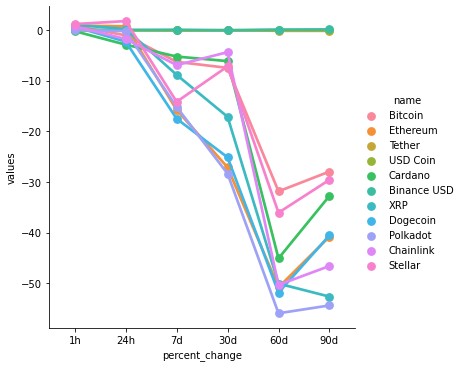

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df_final, kind = 'point')

All of them within 1 hour change are pretty stable. One interesting thing to mention about this data is that all cryptocurrencies were doing fine until 7 days, with Chainlink and Cardano showing an even better result. However, until the 60 days period, a lot of them have gone down (possibily due to the recent big crash in the crypto industry).

In [24]:
df_1 = df[['name', 'quote.USD.price', 'timestamp']]
# Lets look at Bitcoin
df_1 = df_1.query("name=='Bitcoin'")
df_1

,name,quote.USD.price,timestamp
0,Bitcoin,28071.57784,2022-06-12 15:59:19.466995
0,Bitcoin,28063.36089,2022-06-12 15:59:19.969313
0,Bitcoin,28078.24245,2022-06-12 16:00:20.382826
0,Bitcoin,28079.24630,2022-06-12 16:01:20.770445
0,Bitcoin,28056.61922,2022-06-12 16:02:21.166131


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

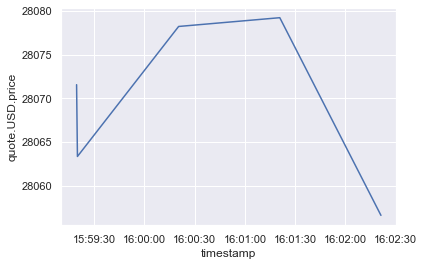

In [25]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data= df_1)

We are looking at a very short time series (60 seconds sleep interval), but we can track the data and use it to show the changes over days, weeks or even months.

# Many more to come...